In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import random
from time import sleep

import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

## Get a user to pick a song. And check it if its Billboards Top 100

Billboard Top 100 **Webscrapping**

* url: https://www.billboard.com/charts/hot-100

In [4]:
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
soup = BeautifulSoup(response.content,"html.parser")

song_name = []

for song in soup.select("span.chart-element__information__song.text--truncate.color--primary"):
    song_name.append(song.get_text())

artist_name = []

for artist in soup.select("span.chart-element__information__artist.text--truncate.color--secondary"):
    artist_name.append(artist.get_text())
    
billboard = pd.DataFrame({
    "song_name":song_name,
    "artist":artist_name,})

billboard["song_name"] = billboard["song_name"].apply(lambda x: x.lower())
billboard["artist"] = billboard["artist"].apply(lambda x: x.lower())

## Code - Asks for song. Sees if it is in top 100. if not asks for artist name. 
## Also find the audio features of that song using spotify API

* Credentials for spotify

In [106]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="ff84e02be03141a2b8bf064b47dce0ba",client_secret="2d8b7ea03f734d87a4d21689e8a4ce94"))

* Check if song is in top 100. If so, recommend another one (besides the same one). If recommend something else.

In [87]:
song_not_top_100 = []
artist_not_top_100 = []
    
hot_song = random.choice(billboard["song_name"])
    
user_input = input("Name of the song you like. If its in the top 100 I'll recommend you a new one?: ").lower()

if user_input in list(billboard["song_name"]):
    sleep(1)
    print("We recommend you hear: ", hot_song)
            
elif user_input not in list(billboard["song_name"]): 
    song_not_top_100.append(user_input)
    sleep(1)
    print("Song not in top 100")   
    artist_input = input("Who is the artist: ")
    artist_not_top_100.append(artist_input)
    search_name = " ".join(song_not_top_100 + artist_not_top_100)    

Name of the song you like. If its in the top 100 I'll recommend you a new one?: clocks
Song not in top 100
Who is the artist: coldplay


In [134]:
results = spotify.search(q=(search_name), limit = 1)
uri_song_chosen = results["tracks"]["items"][0]["uri"]
uri_song_chosen

'spotify:track:0BCPKOYdS2jbQ8iyB56Zns'

## Table of tables to compile playlists. It needs to be empty first. So run this once

In [147]:
# DONT RUN THIS

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature']

table_of_tables = pd.DataFrame(columns = columns)
table_of_tables

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature


# Playlist compiler

## problem to overcome.  How to put many playlists without having to upload one at a time each time i run this program

In [148]:
chinese_top_hits_full_playlist = []
playlist_link = "https://open.spotify.com/playlist/00l0BbtFeevFQRFjkbpLZE"

for i in range(0,1000,100):
    chinese_top_hits_full_playlist.append(spotify.user_playlist_tracks(user="spotify",playlist_id=playlist_link,offset=i))

uri_full_playlist = []

for songs in chinese_top_hits_full_playlist:
    for elem in songs["items"]:
        uri_full_playlist.append(elem["track"]["uri"])

In [149]:
# making sure its clean. 

clean_uris = []

for uri in uri_full_playlist:
    if len(uri) == 36: 
        clean_uris.append(uri)

In [150]:
audio_features_playlist = []

for uri in clean_uris:
    audio_features_playlist.append(spotify.audio_features(uri))

In [151]:
full_table_playlist = pd.concat([pd.DataFrame(d) for d in audio_features_playlist])

In [152]:
table_of_tables = table_of_tables.append(full_table_playlist)

In [153]:
table_of_tables.drop_duplicates()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.335,0.326,0,-7.223,1,0.0331,0.9480,0.000000,0.0619,0.326,169.267,audio_features,632VyMrvhsHIsO4zq9khts,spotify:track:632VyMrvhsHIsO4zq9khts,https://api.spotify.com/v1/tracks/632VyMrvhsHI...,https://api.spotify.com/v1/audio-analysis/632V...,318499,4
0,0.519,0.412,0,-8.584,1,0.0365,0.7500,0.000000,0.1010,0.506,157.916,audio_features,1ZeVIrCWzEmsJexkrgvjFv,spotify:track:1ZeVIrCWzEmsJexkrgvjFv,https://api.spotify.com/v1/tracks/1ZeVIrCWzEms...,https://api.spotify.com/v1/audio-analysis/1ZeV...,265522,4
0,0.471,0.648,3,-3.968,1,0.0342,0.6300,0.000000,0.1220,0.239,135.053,audio_features,190kU2WKyIzx9XaBjfWRPk,spotify:track:190kU2WKyIzx9XaBjfWRPk,https://api.spotify.com/v1/tracks/190kU2WKyIzx...,https://api.spotify.com/v1/audio-analysis/190k...,287000,4
0,0.360,0.465,10,-8.483,1,0.0337,0.4210,0.000278,0.1090,0.205,169.845,audio_features,7cE5ehlKJ3L9Ejhzm3udcF,spotify:track:7cE5ehlKJ3L9Ejhzm3udcF,https://api.spotify.com/v1/tracks/7cE5ehlKJ3L9...,https://api.spotify.com/v1/audio-analysis/7cE5...,282770,4
0,0.399,0.512,8,-5.801,1,0.0357,0.5830,0.000000,0.1040,0.197,133.175,audio_features,2DcmVSLAg0ZzfOQxDshZHY,spotify:track:2DcmVSLAg0ZzfOQxDshZHY,https://api.spotify.com/v1/tracks/2DcmVSLAg0Zz...,https://api.spotify.com/v1/audio-analysis/2Dcm...,285547,4
0,0.402,0.641,2,-5.905,1,0.0335,0.5340,0.000000,0.1120,0.252,145.054,audio_features,0VqSdtXseb9khdZrnYVyM1,spotify:track:0VqSdtXseb9khdZrnYVyM1,https://api.spotify.com/v1/tracks/0VqSdtXseb9k...,https://api.spotify.com/v1/audio-analysis/0VqS...,265800,4
0,0.360,0.233,7,-11.512,1,0.0509,0.9000,0.000004,0.1060,0.370,77.436,audio_features,6iNH42q8haGYDYGhKK6XiJ,spotify:track:6iNH42q8haGYDYGhKK6XiJ,https://api.spotify.com/v1/tracks/6iNH42q8haGY...,https://api.spotify.com/v1/audio-analysis/6iNH...,237000,4
0,0.422,0.366,7,-7.181,1,0.0333,0.7280,0.000000,0.1120,0.224,80.197,audio_features,4vBoopG4WzohMju1GUmwoi,spotify:track:4vBoopG4WzohMju1GUmwoi,https://api.spotify.com/v1/tracks/4vBoopG4Wzoh...,https://api.spotify.com/v1/audio-analysis/4vBo...,299347,4
0,0.598,0.538,7,-6.712,1,0.0373,0.2840,0.000000,0.1270,0.157,135.889,audio_features,5UAGQJmL7Rn4gn7wlkMyqS,spotify:track:5UAGQJmL7Rn4gn7wlkMyqS,https://api.spotify.com/v1/tracks/5UAGQJmL7Rn4...,https://api.spotify.com/v1/audio-analysis/5UAG...,206053,4
0,0.523,0.572,1,-6.834,1,0.0274,0.3560,0.000001,0.1210,0.306,106.943,audio_features,7vs3JM90lKhp11av83WA5j,spotify:track:7vs3JM90lKhp11av83WA5j,https://api.spotify.com/v1/tracks/7vs3JM90lKhp...,https://api.spotify.com/v1/audio-analysis/7vs3...,289480,4


## Clustering our playlist table

In [72]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [73]:
# only value takes value numbers. Thus just take the columns of what you want to cluster. 

cluster_table = table_of_tables[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms"]]
cluster_table

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
0,0.335,0.326,0,-7.223,1,0.0331,0.9480,0.000000,0.0619,0.326,318499
0,0.519,0.412,0,-8.584,1,0.0365,0.7500,0.000000,0.1010,0.506,265522
0,0.471,0.648,3,-3.968,1,0.0342,0.6300,0.000000,0.1220,0.239,287000
0,0.360,0.465,10,-8.483,1,0.0337,0.4210,0.000278,0.1090,0.205,282770
0,0.399,0.512,8,-5.801,1,0.0357,0.5830,0.000000,0.1040,0.197,285547
0,0.402,0.641,2,-5.905,1,0.0335,0.5340,0.000000,0.1120,0.252,265800
0,0.360,0.233,7,-11.512,1,0.0509,0.9000,0.000004,0.1060,0.370,237000
0,0.422,0.366,7,-7.181,1,0.0333,0.7280,0.000000,0.1120,0.224,299347
0,0.598,0.538,7,-6.712,1,0.0373,0.2840,0.000000,0.1270,0.157,206053
0,0.523,0.572,1,-6.834,1,0.0274,0.3560,0.000001,0.1210,0.306,289480


In [74]:
# initialize the transformer
scaler = StandardScaler()

In [75]:
table_of_tables_scaled = scaler.fit_transform(cluster_table)

In [76]:
pd.DataFrame(table_of_tables_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-2.149569,-1.186663,-1.324812,0.306508,0.383482,-0.167932,1.590933,-0.230283,-1.311776,0.356493,0.977435
1,0.472891,-0.463014,-1.324812,-0.342881,0.383482,0.022228,0.836505,-0.230283,-0.492507,2.153032,-0.375624
2,-0.211229,1.522813,-0.449089,1.859604,0.383482,-0.106409,0.379276,-0.230283,-0.052490,-0.511835,0.172935
3,-1.793257,-0.017045,1.594265,-0.294690,0.383482,-0.134374,-0.417065,6.030164,-0.324882,-0.851181,0.064898
4,-1.237409,0.378438,1.010450,0.985004,0.383482,-0.022515,0.200194,-0.230283,-0.429647,-0.931027,0.135824
5,-1.194652,1.463911,-0.740996,0.935381,0.383482,-0.145560,0.013492,-0.230283,-0.262022,-0.382085,-0.368524
6,-1.793257,-1.969214,0.718542,-1.739952,0.383482,0.827613,1.408042,-0.141105,-0.387741,0.795647,-1.104091
7,-0.909602,-0.850082,0.718542,0.326548,0.383482,-0.156746,0.752680,-0.230283,-0.262022,-0.661546,0.488284
8,1.598838,0.597215,0.718542,0.550328,0.383482,0.066972,-0.939069,-0.230283,0.052275,-1.330258,-1.894493
9,0.529901,0.883309,-1.032904,0.492116,0.383482,-0.486730,-0.664731,-0.201233,-0.073444,0.156877,0.236275


In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11,random_state=1234)
kmeans.fit(table_of_tables_scaled)

KMeans(n_clusters=11, random_state=1234)

In [78]:
clusters = kmeans.predict(table_of_tables_scaled)
pd.Series(clusters).value_counts()

6     10
4      8
10     5
2      4
8      3
0      3
7      2
9      1
5      1
3      1
1      1
dtype: int64

In [79]:
table_of_tables["clusters"] = clusters

In [80]:
table_of_tables

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,0.335,0.326,0,-7.223,1,0.0331,0.9480,0.000000,0.0619,0.326,169.267,audio_features,632VyMrvhsHIsO4zq9khts,spotify:track:632VyMrvhsHIsO4zq9khts,https://api.spotify.com/v1/tracks/632VyMrvhsHI...,https://api.spotify.com/v1/audio-analysis/632V...,318499,4,10
0,0.519,0.412,0,-8.584,1,0.0365,0.7500,0.000000,0.1010,0.506,157.916,audio_features,1ZeVIrCWzEmsJexkrgvjFv,spotify:track:1ZeVIrCWzEmsJexkrgvjFv,https://api.spotify.com/v1/tracks/1ZeVIrCWzEms...,https://api.spotify.com/v1/audio-analysis/1ZeV...,265522,4,6
0,0.471,0.648,3,-3.968,1,0.0342,0.6300,0.000000,0.1220,0.239,135.053,audio_features,190kU2WKyIzx9XaBjfWRPk,spotify:track:190kU2WKyIzx9XaBjfWRPk,https://api.spotify.com/v1/tracks/190kU2WKyIzx...,https://api.spotify.com/v1/audio-analysis/190k...,287000,4,4
0,0.360,0.465,10,-8.483,1,0.0337,0.4210,0.000278,0.1090,0.205,169.845,audio_features,7cE5ehlKJ3L9Ejhzm3udcF,spotify:track:7cE5ehlKJ3L9Ejhzm3udcF,https://api.spotify.com/v1/tracks/7cE5ehlKJ3L9...,https://api.spotify.com/v1/audio-analysis/7cE5...,282770,4,1
0,0.399,0.512,8,-5.801,1,0.0357,0.5830,0.000000,0.1040,0.197,133.175,audio_features,2DcmVSLAg0ZzfOQxDshZHY,spotify:track:2DcmVSLAg0ZzfOQxDshZHY,https://api.spotify.com/v1/tracks/2DcmVSLAg0Zz...,https://api.spotify.com/v1/audio-analysis/2Dcm...,285547,4,4
0,0.402,0.641,2,-5.905,1,0.0335,0.5340,0.000000,0.1120,0.252,145.054,audio_features,0VqSdtXseb9khdZrnYVyM1,spotify:track:0VqSdtXseb9khdZrnYVyM1,https://api.spotify.com/v1/tracks/0VqSdtXseb9k...,https://api.spotify.com/v1/audio-analysis/0VqS...,265800,4,4
0,0.360,0.233,7,-11.512,1,0.0509,0.9000,0.000004,0.1060,0.370,77.436,audio_features,6iNH42q8haGYDYGhKK6XiJ,spotify:track:6iNH42q8haGYDYGhKK6XiJ,https://api.spotify.com/v1/tracks/6iNH42q8haGY...,https://api.spotify.com/v1/audio-analysis/6iNH...,237000,4,10
0,0.422,0.366,7,-7.181,1,0.0333,0.7280,0.000000,0.1120,0.224,80.197,audio_features,4vBoopG4WzohMju1GUmwoi,spotify:track:4vBoopG4WzohMju1GUmwoi,https://api.spotify.com/v1/tracks/4vBoopG4Wzoh...,https://api.spotify.com/v1/audio-analysis/4vBo...,299347,4,10
0,0.598,0.538,7,-6.712,1,0.0373,0.2840,0.000000,0.1270,0.157,135.889,audio_features,5UAGQJmL7Rn4gn7wlkMyqS,spotify:track:5UAGQJmL7Rn4gn7wlkMyqS,https://api.spotify.com/v1/tracks/5UAGQJmL7Rn4...,https://api.spotify.com/v1/audio-analysis/5UAG...,206053,4,2
0,0.523,0.572,1,-6.834,1,0.0274,0.3560,0.000001,0.1210,0.306,106.943,audio_features,7vs3JM90lKhp11av83WA5j,spotify:track:7vs3JM90lKhp11av83WA5j,https://api.spotify.com/v1/tracks/7vs3JM90lKhp...,https://api.spotify.com/v1/audio-analysis/7vs3...,289480,4,0


In [81]:
kmeans.inertia_

134.85643053618725

In [82]:
K = range(2, 20)

# For each model, store the inertia in a list
inertia = []


for k in K:
    kmeans = KMeans(n_clusters=k,
        random_state=1234)
    kmeans.fit(table_of_tables_scaled)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

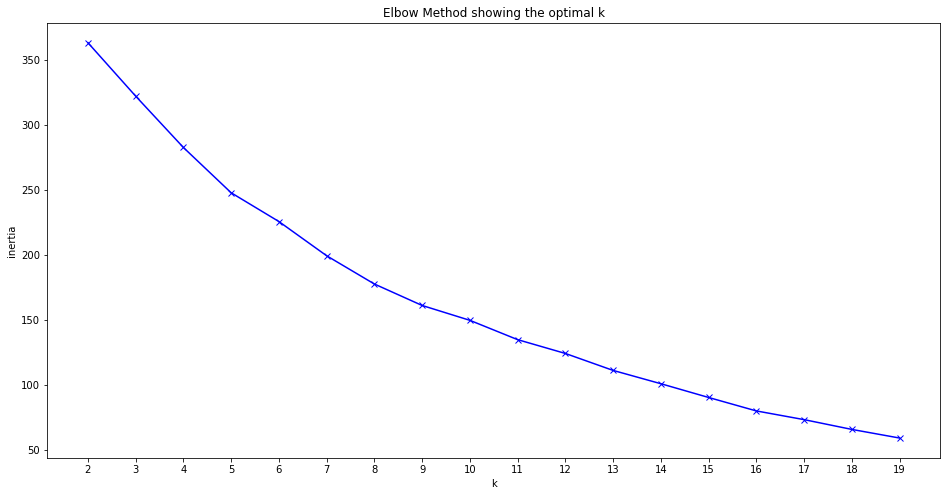

In [83]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
K = range(2, 20)
silhouette = []

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=1234)
    prediction = kmeans.fit_predict(table_of_tables_scaled)    
    score = silhouette_score(table_of_tables_scaled, prediction)
    silhouette.append(score)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

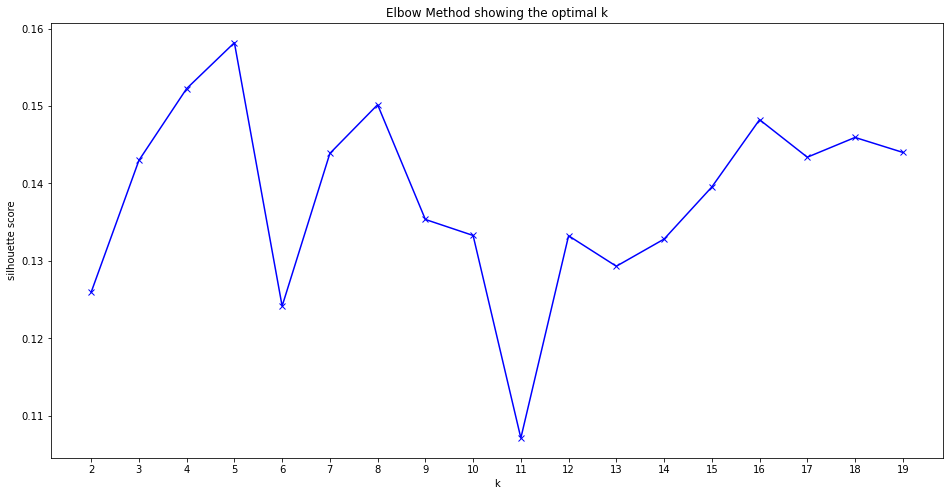

In [86]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Clustering the individual user song with the clustering already done with playlist

* connect the song with its audio features

In [135]:
audio_features = spotify.audio_features(uri_song_chosen)

In [136]:
user_audio_feature_dataframe = pd.DataFrame(audio_features)
user_audio_feature_dataframe

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.749,5,-7.215,0,0.0279,0.599,0.0115,0.183,0.255,130.97,audio_features,0BCPKOYdS2jbQ8iyB56Zns,spotify:track:0BCPKOYdS2jbQ8iyB56Zns,https://api.spotify.com/v1/tracks/0BCPKOYdS2jb...,https://api.spotify.com/v1/audio-analysis/0BCP...,307880,4


In [137]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

user_cluster_table = user_audio_feature_dataframe[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms"]]
user_cluster_table

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
0,0.577,0.749,5,-7.215,0,0.0279,0.599,0.0115,0.183,0.255,307880


In [138]:
user_song_scaled = scaler.transform(user_cluster_table)

In [139]:
user_input_normalized = pd.DataFrame(user_song_scaled)
user_input_normalized

,0,1,2,3,4,5,6,7,8,9,10
0,1.299536,2.372679,0.134727,0.310326,-2.607681,-0.458765,0.261158,258.745055,1.225653,-0.352142,0.706221


In [140]:
user_clusters = kmeans.predict(user_input_normalized)
print(user_clusters)

[3]


# Using clustering information, recommend a song from that cluster. This song is the recommended song the user should hear

In [117]:
value_of_cluster_of_user = user_clusters[0]
value_of_cluster_of_user

3

In [118]:
playlist_cluster_of_user = table_of_tables[table_of_tables["clusters"] == value_of_cluster_of_user]
playlist_cluster_of_user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,0.488,0.629,2,-6.804,1,0.129,0.551,0.0,0.229,0.371,139.812,audio_features,35fpQiijFocukVyzHCjhCn,spotify:track:35fpQiijFocukVyzHCjhCn,https://api.spotify.com/v1/tracks/35fpQiijFocu...,https://api.spotify.com/v1/audio-analysis/35fp...,230571,4,3


In [119]:
list_of_uri_of_cluster = playlist_cluster_of_user["uri"]
a = list(list_of_uri_of_cluster)

In [120]:
random_song = random.choice(a)
random_song

'spotify:track:35fpQiijFocukVyzHCjhCn'

In [121]:
random_song_track_info = spotify.track(random_song)

In [122]:
random_song_track_info["name"]

'說散就散'

---